# Cluster 2018

# clase_00: Importar data, describirla y visualizarla.

**Objetivo:**En esta primera clase aprenderemos a importar archivos .csv a python. Luego procederemos a realizar el adecuado pre-procesamiento y limpieza de datos con el fin de obtener un dataset acorde para ser analizado. Finalmente realizaremos un análisis exploratorio de los datos, con el fin de obtener estadísticas descriptivas y visualizaciones.

## **Comencemos:**

**Importamos las Librerías necesarias:** Utilizaremos Numpy para realizar calculos matriciales, pandas para manejar los datos y almacenarlos, y matplotlib junto con Seaborn para visualizar.

In [1]:
# importamos las librerías necesarias para trabajar.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read .csv

**Read_CSV:** Descargamos de https://data.buenosaires.gob.ar/dataset/subte-viajes-molinetes el dataset de usuarios de subte por molinete del año 2017. Luego con el comando de Pandas "pd.read_csv" indicamos donde se ubica el dataset a ser leido. Una vez leido guardamos la tabla como un DataFrame de Pandas en el elemento "molinetes". Solicitaremos que el indice de nuestro dataframe importado sea la columna "PERIODO" del archvo .csv que manejamos.

In [2]:
pwd

'/home/human/Dropbox/clusterai/clases/clase_00'

In [3]:
ls

cluster_clase00_asignacion_subtes.ipynb  molinetes-2017.zip
cluster_clase00.ipynb                    molinetes_historico_2017.csv
cluster_clase00_python_genesis.ipynb     molinetes_historico.csv
matrimonios_2018.csv                     python_primeros_pasos.ipynb
molinetes-2017/                          test/


In [6]:
# importante detallar que el delimiter indica como estan separadas las columnas en el dataframe.
molinetes = pd.read_csv('/home/human/Dropbox/clusterai/clases/clase_00/molinetes_historico.csv', delimiter=';')

# Visualizar el dataset importado
con el comando .head() podemos ver en pantalla las primeras filas y del dataframe

In [7]:
molinetes.head()

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
0,201701,01/01/2017,08:00:00,08:15:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN02,CASEROS,1,0,0,1,1
1,201701,01/01/2017,08:00:00,08:15:00,LINEA_H,LINEA_H_CASEROS_NORTE_TURN02,CASEROS,1,0,0,1,1
2,201701,01/01/2017,08:15:00,08:30:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN02,CASEROS,2,0,0,2,1
3,201701,01/01/2017,08:15:00,08:30:00,LINEA_H,LINEA_H_CASEROS_SUR_TURN01,CASEROS,1,0,0,1,1
4,201701,01/01/2017,08:30:00,08:45:00,LINEA_H,LINEA_H_CASEROS_NORTE_TURN01,CASEROS,2,0,0,2,1


# comando shape
si queremos saber cuantos renglones y columnas tiene el objeto en cuestion, utilizamos el comando de numpy "shape".Asi podemos ver que nuestro dataset posee mas de 11 millones de renglones y 12 columnas

In [8]:
# comando shape en el dataframe importado "molinetes"
np.shape(molinetes)

(11938476, 12)

In [9]:
# Imprimimos en pantalla un reporte de un renglón sobre las dimensiones de nuestro dataframe.
# Ver que utilizamos la función de numpy "shape".
print("El dataset importado tiene "+ str(np.shape(molinetes)[0]) + " renglones y " + str(np.shape(molinetes)[1]) + " columnas")

El dataset importado tiene 11938476 renglones y 12 columnas


# Verificamos si existen columnas con valores faltantes

In [10]:
# revisamos si existen columnas que contengan valores faltantes (NaNs)
col_nulls = molinetes.isnull().any()
col_nulls

PERIODO            False
FECHA              False
DESDE              False
HASTA              False
LINEA              False
MOLINETE           False
ESTACION           False
PAX_PAGOS          False
PAX_PASES_PAGOS    False
PAX_FRANQ          False
TOTAL              False
ID                 False
dtype: bool

# Columnas e Indices en Pandas

**Columnas e Indices en Pandas:** los dataframes de pandas se caracterizan por tener nombres explícitos por columna y por renglón (indice). Es decir que podemos llamar a un elemento (o varios) de un DataFrame por el nombre de su columna e índice.

In [12]:
# Obtenemos los nombres de las columnas del dataframe Molinetes y lo guardamos en "columnas_molinetes"
columnas_molinetes = molinetes.columns
columnas_molinetes

Index(['PERIODO', 'FECHA', 'DESDE', 'HASTA', 'LINEA', 'MOLINETE', 'ESTACION',
       'PAX_PAGOS', 'PAX_PASES_PAGOS', 'PAX_FRANQ', 'TOTAL', 'ID'],
      dtype='object')

In [13]:
# Obtenemos los nombres de los índices (renglones) del dataframe Molinetes y lo guardamos en "instancias_molinetes"
instancias_molinetes = molinetes.index
instancias_molinetes

RangeIndex(start=0, stop=11938476, step=1)

# Seleccionar una sola columna de un dataframe
Podremos seleccionar la o las columnas y renglones que quisiéramos para futuros análisis.

In [17]:
# seleccionamos la columna LINEA de molinetes
molinetes.LINEA.head(5)

0    LINEA_H
1    LINEA_H
2    LINEA_H
3    LINEA_H
4    LINEA_H
Name: LINEA, dtype: object

In [20]:
# ver que tambien podriamos haber utilizado corchetes para ingresar el nombre de la columna a seleccionar
molinetes['LINEA'].head()

0    LINEA_H
1    LINEA_H
2    LINEA_H
3    LINEA_H
4    LINEA_H
Name: LINEA, dtype: object

# Filtrar un dataframe por el valor de una columna

**Filtrar un dataframe por el valor de una columna:** Inicialmente filtraremos nuestro dataframe inicial "molinetes"por el valor "LINEA_B" de la columna "LINEA" y guardar el resultado en el dataframe "molinetes_b". 

Primero observamos que podemos aplicar una operación "booleana" donde la respuesta será True o False. De esta manera obtendremos un vector "mascara" donde indicará con True cada renglon de "molinetes" cuyo valor de la columna "LINEA" sea "LINEA_B".

In [28]:
(molinetes['LINEA'] == 'LINEA_B')

0           False
1           False
2           False
3           False
4           False
5           False
6           False
7           False
8           False
9           False
10          False
11          False
12          False
13          False
14          False
15          False
16          False
17          False
18          False
19          False
20          False
21          False
22          False
23          False
24          False
25          False
26          False
27          False
28          False
29          False
            ...  
11938446    False
11938447    False
11938448    False
11938449    False
11938450     True
11938451     True
11938452     True
11938453     True
11938454     True
11938455     True
11938456     True
11938457     True
11938458     True
11938459    False
11938460    False
11938461    False
11938462    False
11938463    False
11938464    False
11938465    False
11938466    False
11938467    False
11938468    False
11938469    False
11938470  

### Filtrar un dataframe por ".loc"

Para poder filtrar con una máscara booleana al dataframe "molinetes" utilizaremos la sub-función ".loc" que sirve para filtrar los dataframes de pandas de esta manera.

In [21]:
# como inicialmente queremos trabajar con los datos de la Linea B, filtramos por el valor "LINEA_B" de la columna
# "LINEA" nuestro dataframe original llamado molinetes.

molinetes_b = molinetes.loc[molinetes['LINEA'] == 'LINEA_B']

In [22]:
molinetes_b.index

Int64Index([ 2492243,  2492244,  2492245,  2492246,  2492247,  2492248,
             2492249,  2492250,  2492251,  2492252,
            ...
            11938436, 11938450, 11938451, 11938452, 11938453, 11938454,
            11938455, 11938456, 11938457, 11938458],
           dtype='int64', length=2855204)

In [23]:
# observamos que la cantidad de renglones del nuevo dataframe es menor al del original, puesto que solo 
# estamos considerando a los molinetes de la linea B
np.shape(molinetes_b)

(2855204, 12)

In [24]:
# hacemos un head de solamente los primeros 3 renglones del nuevo dataframe "molinetes_b"
molinetes_b.head(3)

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
2492243,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_FLORIDA_O_TURN01,FLORIDA,4,0,0,4,20
2492244,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_FLORIDA_O_TURN03,FLORIDA,3,0,0,3,20
2492245,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_FLORIDA_O_TURN02,FLORIDA,1,0,0,1,20


### Filtrar un dataframe con ".iloc"
Podriamos filtrar nuestro dataframe de otra manera, por ejemplo indicando simultàneamente que renglones y columnas queremos preservar. Para ello en vez de utilizar .loc utilizaremos .iloc.

In [32]:
# por ejemplo con .iloc seleccionamos los primeros 10 renglones y 3 columnas del nuevo dataframe "molinetes_b"
molinetes_b.iloc[0:10,0:3] 

,PERIODO,FECHA,DESDE
2492243,201701,01/01/2017,08:00:00
2492244,201701,01/01/2017,08:00:00
2492245,201701,01/01/2017,08:00:00
2492246,201701,01/01/2017,08:00:00
2492247,201701,01/01/2017,08:15:00
2492248,201701,01/01/2017,08:30:00
2492249,201701,01/01/2017,08:30:00
2492250,201701,01/01/2017,08:45:00
2492251,201701,01/01/2017,09:00:00
2492252,201701,01/01/2017,09:00:00


#### **Consejo:** 
Para saber todos los atajos y trucos en Pandas te recomendamos que tengas a mano la "Pandas Cheat Sheet" donde encontrarás muchos consejos y sugerencias para agilizar tu trabajo. https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf

# Primeras visualizaciones: Countplot

Visualización Countplot de Seaborn para las distintas lineas de subte sobre el dataframe "molinetes".

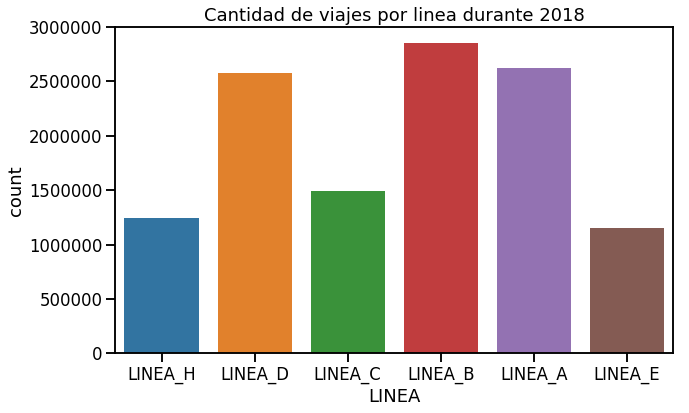

In [61]:
# con el comando "countplot" de Seaborn (importado como sns) generamos un gráfico de barras por la columna "LINEA"
sns.set_context("talk")
plt.figure(figsize=(10,6))
sns.countplot(x="LINEA", data=molinetes)
plt.title("Cantidad de viajes por linea durante 2018")
plt.show()

Visualización de Countplot de Seaborn para las distintas estaciones de la linea B.

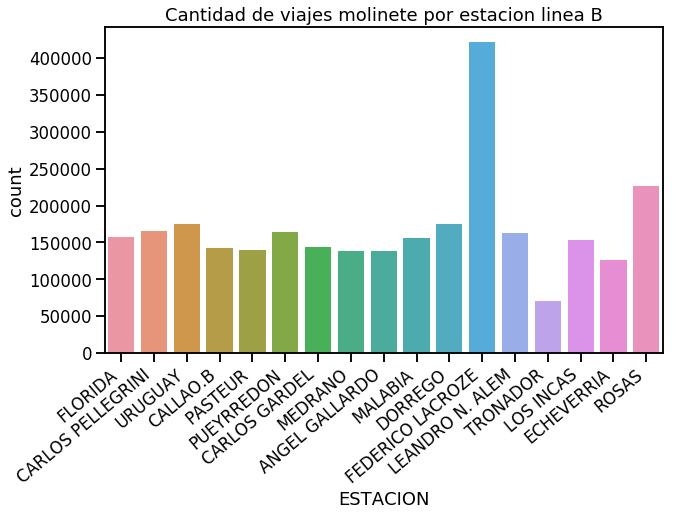

In [64]:
# luego generamos un countplot de seaborn por la columna estación, esta vez utilizando el nuevo dataframe filtrado
# molinetes_b, que solo contiene los datos de la linea B.
plt.figure(figsize=(10,6))
ax = sns.countplot(x="ESTACION", data=molinetes_b)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("Cantidad de viajes molinete por estacion linea B")
plt.show()

si quisieramos imprimir en pantalla los valores unicos de la columna "ESTACION" podemos usar el comando "np.unique" de numpy

In [80]:
# imprimimos todos los valores unicos dentro de la columna "ESTACION" para el dataframe "molinetes_b"
np.unique(molinetes_b.ESTACION)

array(['ANGEL GALLARDO', 'CALLAO.B', 'CARLOS GARDEL', 'CARLOS PELLEGRINI',
       'DORREGO', 'ECHEVERRIA', 'FEDERICO LACROZE', 'FLORIDA',
       'LEANDRO N. ALEM', 'LOS INCAS', 'MALABIA', 'MEDRANO', 'PASTEUR',
       'PUEYRREDON', 'ROSAS', 'TRONADOR', 'URUGUAY'], dtype=object)

# Estadisticas Descriptivas

Con el comando de numpy .mean() puedo obtener la media del elemento seleccionado, en este caso la columna "TOTAL" del dataframe "molinetes_b".

In [81]:
media_tot_b = np.mean(molinetes_b['TOTAL'])

In [82]:
# Luego procedemos a imprimir por pantalla la media calculada mas un texto 
print("La media total de todo el año 2017 para la linea B es " + str(media_tot_b))

La media total de todo el año 2017 para la linea B es 31.07430502338887


por medio del comando .std() de numpy podemos calcular el desvío estandard de la variable en cuestion, en este caso la columna "TOTAL" del dataframe molinetes_b

In [83]:
desvio_std_tot_b = np.std(molinetes_b['TOTAL'])
print("El desvio estándard de la variable total para todo el año 2017 es " + str(desvio_std_tot_b))

El desvio estándard de la variable total para todo el año 2017 es 33.073673874646964


por medio del comando .describe() de pandas podemos obtener estadísticas descriptivas del elemento en cuestion, La cantidad de instancias, la media, el desvio estandard, el valor minimo, el 1er cuartil, el 2do cuartil, el 3er cuartil y el valor máximo.

In [84]:
molinetes_b['TOTAL'].describe()

count    2.855204e+06
mean     3.107431e+01
std      3.307368e+01
min      0.000000e+00
25%      6.000000e+00
50%      2.000000e+01
75%      4.400000e+01
max      3.690000e+02
Name: TOTAL, dtype: float64

# Análisis del mes de Abril para la linea B

Primero filtramos utilizando .loc el dataframe "molinetes_b" por los renglones que en la columna "PERIODO" sean iguales a "201704". Generamos un nuevo dataframe filtrando y reteniendo las instancias/renglones con indice referido al mes de Abril

In [85]:
# el filtrado se realiza mediante la accion de pandas ".loc".
molinetes_b_abril = molinetes_b.loc[molinetes_b['PERIODO'] == 201704]

In [86]:
# imprimimos por pantalla los primeros 3 renglones del mes de abril
molinetes_b_abril.head(3)

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
2527911,201704,01/04/2017,05:00:00,05:15:00,LINEA_B,LINEA_B_FLORIDA_E_TURN02,FLORIDA,0,0,0,0,20
2527912,201704,01/04/2017,05:00:00,05:15:00,LINEA_B,LINEA_B_FLORIDA_O_TURN04,FLORIDA,1,0,0,1,20
2527913,201704,01/04/2017,05:15:00,05:30:00,LINEA_B,LINEA_B_FLORIDA_O_TURN04,FLORIDA,1,0,0,1,20


In [87]:
# Obtenemos estadísticas descriptivas de la columna "TOTAL" del mes de abril.
molinetes_b_abril['TOTAL'].describe()

count    225725.000000
mean         30.301743
std          33.434120
min           0.000000
25%           6.000000
50%          19.000000
75%          43.000000
max         266.000000
Name: TOTAL, dtype: float64

# Visualización Distplot
Utilizaremos esta visualización para generar un histograma + una curva de distribución de los datos a partir de sus frecuencias poblacionales

/home/human/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


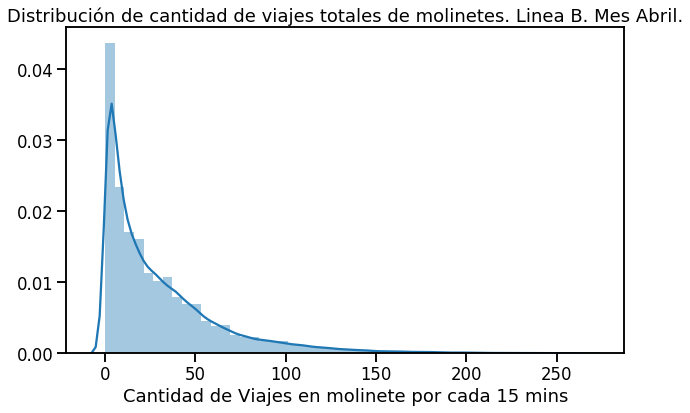

In [88]:
# displot para la columna "TOTAL" nos generará un histograma + la distribución generada de los datos a partir de 
# sus frecuencias poblacionales.
plt.figure(figsize=(10,6))
sns.distplot(molinetes_b_abril['TOTAL'])
plt.title('Distribución de cantidad de viajes totales de molinetes. Linea B. Mes Abril.')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.show()

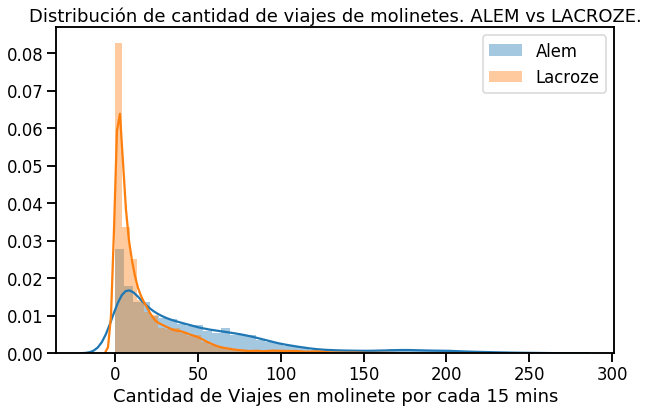

In [92]:
# displot para la columna "TOTAL" nos generará un histograma + la distribución generada de los datos a partir de 
# sus frecuencias poblacionales.
plt.figure(figsize=(10,6))
sns.distplot(molinetes_b_abril.loc[molinetes_b_abril.ESTACION == 'LEANDRO N. ALEM']['TOTAL'], label = 'Alem')
sns.distplot(molinetes_b_abril.loc[molinetes_b_abril.ESTACION == 'FEDERICO LACROZE']['TOTAL'], label = 'Lacroze')
plt.title('Distribución de cantidad de viajes de molinetes. ALEM vs LACROZE.')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.legend(loc='upper right')
plt.show()

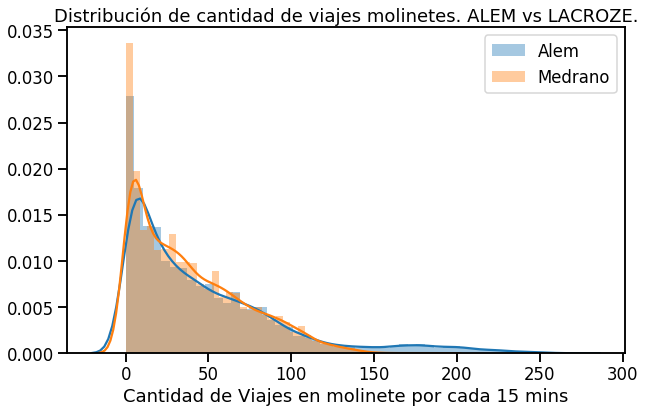

In [93]:
# displot para la columna "TOTAL" nos generará un histograma + la distribución generada de los datos a partir de 
# sus frecuencias poblacionales.
plt.figure(figsize=(10,6))
sns.distplot(molinetes_b_abril.loc[molinetes_b_abril.ESTACION == 'LEANDRO N. ALEM']['TOTAL'], label = 'Alem')
#sns.distplot(molinetes_b_abril.loc[molinetes_b_abril.ESTACION == 'FEDERICO LACROZE']['TOTAL'], label = 'Lacroze')
sns.distplot(molinetes_b_abril.loc[molinetes_b_abril.ESTACION == 'MEDRANO']['TOTAL'], label = 'Medrano')
plt.title('Distribución de cantidad de viajes molinetes. ALEM vs LACROZE.')
plt.xlabel('Cantidad de Viajes en molinete por cada 15 mins')
plt.legend(loc='upper right')
plt.show()

In [78]:
# visualizamos en pantalla las columnas del dataframe de la linea B
molinetes_b_abril.columns

Index(['PERIODO', 'FECHA', 'DESDE', 'HASTA', 'LINEA', 'MOLINETE', 'ESTACION',
       'PAX_PAGOS', 'PAX_PASES_PAGOS', 'PAX_FRANQ', 'TOTAL', 'ID'],
      dtype='object')

# Tabla Pivote para Linea B, con Estaciones y Periodos
Las tablas pivote son elementos poderosos para resumir la información de nuestro dataframe, seleccionando que datos queremos que marquen nuestros renglones, otros para las columnas y otros para los valores. En otras palabras, podemos obtener un nuevo dataframe cuyas columnas y filas las podemos definir nosotros en funcion de los valores originales.

En este caso decidimos realizar una tabla pivote donde las columnas son los valores de la columna "ESTACIONES", el indice equivale a los valores de la columna "PERIODO" y los valores equivalen a la columna "TOTAL". Finalmente, con el comando "aggfunc" indicamos que el valor de cada celda sea la suma correspondiente de TOTAL para cada columna y renglon.

In [94]:
linea_b_2017 = pd.pivot_table(molinetes_b,values = 'TOTAL',columns = 'ESTACION', index = molinetes_b.PERIODO.values, aggfunc = np.sum)

In [95]:
linea_b_2017.head(3)

ESTACION,ANGEL GALLARDO,CALLAO.B,CARLOS GARDEL,CARLOS PELLEGRINI,DORREGO,ECHEVERRIA,FEDERICO LACROZE,FLORIDA,LEANDRO N. ALEM,LOS INCAS,MALABIA,MEDRANO,PASTEUR,PUEYRREDON,ROSAS,TRONADOR,URUGUAY
201701,302879,338280,353255,502598,292664,141750,511695,441188,553090,195713,377889,341292,248076,268862,541408,106590,309308
201702,284650,346552,325949,470302,271066,132879,474681,366084,495892,180915,349323,321815,238332,236438,508530,107466,342773
201703,406406,511642,415533,609721,377516,185013,686928,520120,712461,256731,503086,471902,362952,329502,708116,156945,486818


Obtenemos un nuevo dataframe de 12 renglones (meses) y 17 columnas (estaciones).

In [100]:
linea_b_2017.shape

(12, 17)

**Heatmap con Seaborn**: con el comando sns.heatmap() podremos visualizar los valores del dataframe obtenido en el ultimo paso y asi en una sola figura entender cuales son los pares "mes-estacion" de mayor cantidad de viajes.

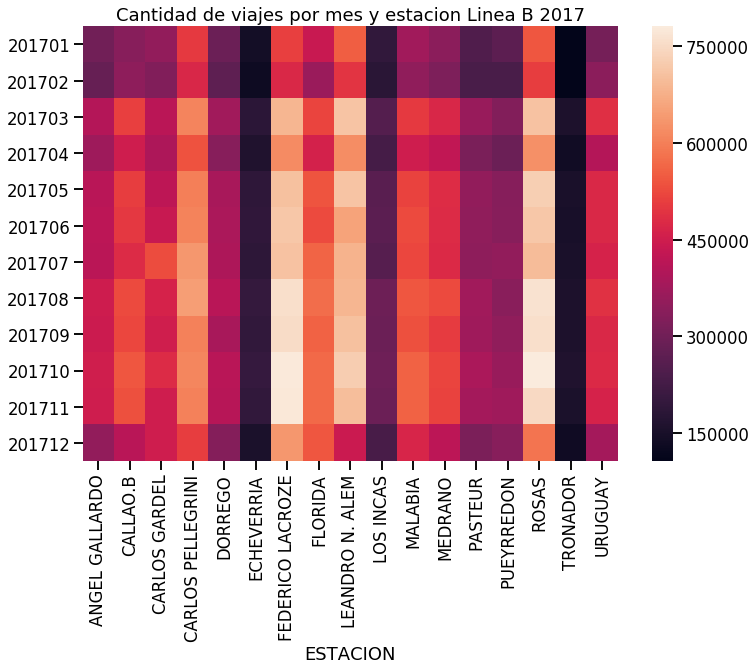

In [103]:
plt.figure(figsize=(12,8))
sns.heatmap(linea_b_2017)
plt.title("Cantidad de viajes por mes y estacion Linea B 2017")
plt.show()

### ¿que conclusiones parciales podemos obtener en base a las visualizaciones realizadas? 

# Visualizando series de tiempo con comando "plot" de matplotlib (plt)
Utilizando el dataframe obtenido de la tabla pivote en el paso anterior, procedemos a visualizar la cantidad de pasajeros que pasaron por cada estación a lo largo de todo el año 2017.

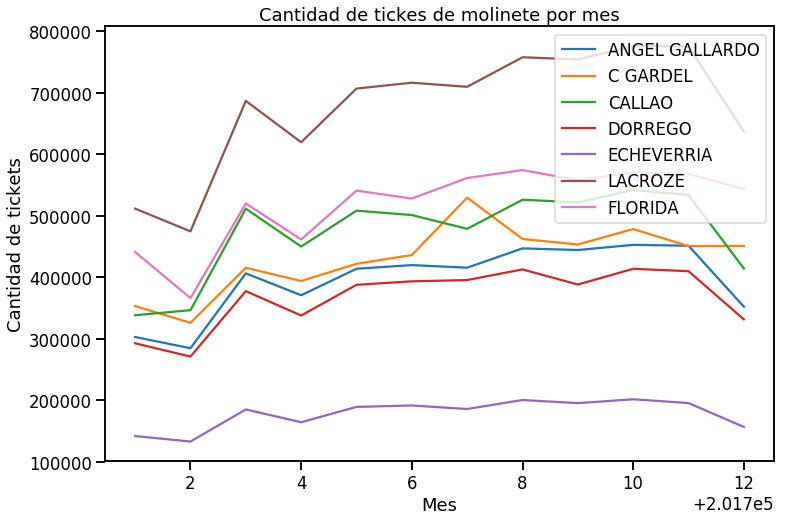

In [112]:
plt.figure(figsize=(12,8))
plt.plot(linea_b_2017.index, linea_b_2017['ANGEL GALLARDO'], label='ANGEL GALLARDO');
plt.plot(linea_b_2017.index, linea_b_2017['CARLOS GARDEL'], label='C GARDEL');
plt.plot(linea_b_2017.index, linea_b_2017['CALLAO.B'], label='CALLAO');
plt.plot(linea_b_2017.index, linea_b_2017['DORREGO'], label='DORREGO');
plt.plot(linea_b_2017.index, linea_b_2017['ECHEVERRIA'], label='ECHEVERRIA');
plt.plot(linea_b_2017.index, linea_b_2017['FEDERICO LACROZE'], label='LACROZE');
plt.plot(linea_b_2017.index, linea_b_2017['FLORIDA'], label='FLORIDA');
plt.legend(loc='upper right')
plt.title('Cantidad de tickes de molinete por mes')
plt.ylabel('Cantidad de tickets')
plt.xlabel('Mes')
plt.show()

# Análisis de la estación Lacroze de la linea B
Creamos un dataframe llamado "molinetes_lacroze" que contiene unicamente las instancias del dataframe "molinetes_b" cuyo valor del atributo/feature "ESTACION" sea igual a "FEDERICO LACROZE"

In [113]:
molinetes_lacroze = molinetes_b.loc[molinetes_b['ESTACION']== 'FEDERICO LACROZE']

In [114]:
molinetes_lacroze.head(3)

,PERIODO,FECHA,DESDE,HASTA,LINEA,MOLINETE,ESTACION,PAX_PAGOS,PAX_PASES_PAGOS,PAX_FRANQ,TOTAL,ID
7622359,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_O_TURN09,FEDERICO LACROZE,2,0,0,2,66
7622360,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_E_TURN05,FEDERICO LACROZE,4,0,0,4,66
7622361,201701,01/01/2017,08:00:00,08:15:00,LINEA_B,LINEA_B_LACROZE_E_TURN06,FEDERICO LACROZE,0,0,1,1,66


Podriamos seleccionar varias columnas en simultáneo con doble corchete en los extremos y detallando las columnas en cuestión. Así podriamos ver que tipo de pago es el mas utilizado en los molinetes de la estación Lacroze de la linea B.

In [122]:
molinetes_lacroze[['PAX_PAGOS', 'PAX_PASES_PAGOS', 'PAX_FRANQ']].sum()

PAX_PAGOS          7742567
PAX_PASES_PAGOS      42605
PAX_FRANQ           341520
dtype: int64

### Ejercicio 00:
Partiendo del dataframe "molinetes" crear un dataframe que contenga todos los viajes de la linea D.

In [124]:
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 

### Ejercicio 01:
Determinar cual es la estacion de mayor cantidad de viajes en la linea D durante todo el año.

In [ ]:
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 

### Ejercicio 02:
Para la estación de mayor cantidad de viajes determinar cual es el mes de mayor cantidad de viajes.

In [125]:
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 

### Ejercicio 03:
Para la estación de mayor cantidad de viajes, en el mes de mayor cantidad de viajes, determinar cual es el molinete de mayor cantidad de viajes.

In [126]:
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 
### resolver el ejercicio en estas celdas. Agregar mas celdas si es necesario ### 